In [2]:
import numpy as np
import CellModeller
from CellModeller.Simulator import Simulator 

In [3]:
model = '/Users/timrudge/cellmodeller/Examples/ex1_simpleGrowth.py'
sim = Simulator(model, 0.025, clPlatformNum=0, clDeviceNum=0, saveOutput=True)

Set up OpenCL context:
  Platform: Apple
  Device: Intel(R) Core(TM) i7-3820QM CPU @ 2.70GHz
Importing model ex1_simpleGrowth
Running in batch mode: no display will be output


/Users/timrudge/anaconda2/envs/cellmodeller/lib/python2.7/site-packages/pyopencl/__init__.py:61: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


In [ ]:
# Run the simulation to ~500 cells
while len(sim.cellStates)<500:
    sim.step()

In [18]:
print sim.phys.n_cells
print sim.stepNum

# We can get the data directly from the running simulation
cs = sim.cellStates

# or from a saved pickle file
import cPickle
data = cPickle.load(open('/Users/timrudge/cellmodeller/data/ex1_simpleGrowth-17-11-17-14-00/step-00600.pickle','rb'))
cs = data['cellStates']

# Make some convenient data arrays from cell properties
lengths = np.array([cell.length for (id,cell) in cs.iteritems()])
pos = np.array([cell.pos for (id,cell) in cs.iteritems()])
norm = np.array([cell.dir for (id,cell) in cs.iteritems()])

3
0


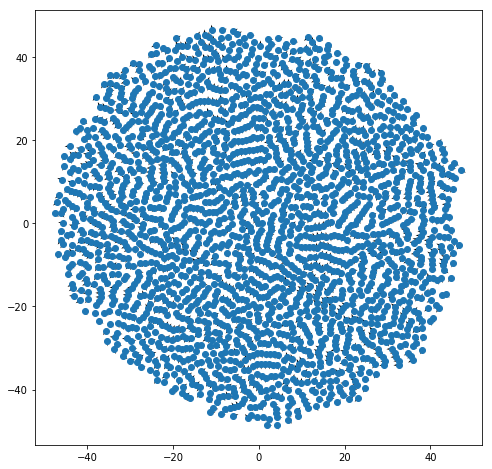

In [19]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Plot the position and orientation of each cell
plt.figure(figsize=(8,8))
plt.plot(pos[:,0], pos[:,1], 'o')
plt.quiver(pos[:,0], pos[:,1], norm[:,0], norm[:,1])

(array([  32.,   89.,  137.,  209.,  249.,  312.,  339.,  381.,  402.,  182.]),
 array([  0.23257172,   5.17148305,  10.11039438,  15.04930571,
         19.98821704,  24.92712837,  29.86603971,  34.80495104,
         39.74386237,  44.6827737 ,  49.62168503]),
 <a list of 10 Patch objects>)

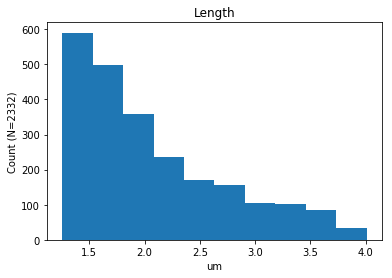

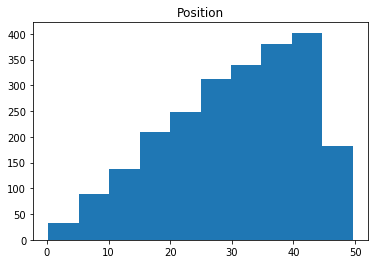

In [20]:
# Plot histograms of some cell properties

# Length
plt.figure()
plt.title('Length')
plt.hist(lengths)
plt.xlabel('um')
plt.ylabel('Count (N=%d)'%(len(cs)))

# Distance from origin
plt.figure()
plt.title('Position')
plt.hist(np.sqrt(pos[:,0]**2+pos[:,1]**2))

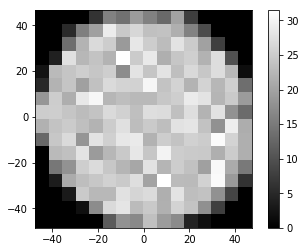

In [21]:
# Compute the cell density in regular bins as a weighted 2d histogram

fig = plt.figure()
H, xedges, yedges = np.histogram2d(pos[:,0], pos[:,1], weights=lengths, bins=16)
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='gray')
plt.colorbar()

In [ ]:
# We can also examine the details of the running simulation,
# e.g. the residual overlaps between cells (error)

# Get the physics solver
phys = sim.phys
# Update the contact information
phys.find_contacts()
# Overlap per cell
d = 0.5*phys.ct_dists_dev[0:phys.n_cells,:].get()

# Min and max of overlap
print np.min(d.ravel()), np.max(d.ravel())